In [1]:
import cv2
import numpy as np
from PIL import Image
import queue
import matplotlib.pyplot as plt

In [2]:
class Vertex:
    def __init__(self,x_coordinate,y_coordinate):
        self.x = x_coordinate
        self.y = y_coordinate
        self.xParent = None
        self.yParent = None
        self.processed = False
        self.queueIndex = None
        self.condition = None

In [3]:
def get_neighbors(mat, r, c):
    shape=mat.shape
    neighbors=[]
    #ensure neighbors are within image boundaries
    if r > 0 and not mat[r-1][c].processed and not mat[r-1][c].condition ==0:
        neighbors.append(mat[r-1][c])
    if r < shape[0] - 1 and not mat[r+1][c].processed and not mat[r+1][c].condition ==0:
        neighbors.append(mat[r+1][c])
    if c > 0 and not mat[r][c-1].processed and not mat[r][c-1].condition ==0:
        neighbors.append(mat[r][c-1])
    if c < shape[1] - 1 and not mat[r][c+1].processed and not mat[r][c+1].condition == 0:
        neighbors.append(mat[r][c+1])
    return neighbors

In [19]:
def path_from(matrix, x, y, xS, yS):
    path = []
    iter_v=matrix[y][x]
    path.append((x,y))
    while(iter_v.y!=yS or iter_v.x!=xS):
        path.append((iter_v.x,iter_v.y))
        iter_v=matrix[iter_v.yParent][iter_v.xParent]
    path.append((xS,yS))
    return path

In [30]:
def find_shortest_path_bfs(matrix, x_start, y_start, x_end, y_end):
    #assuming start and end are withing bounds
    #let 0 be black (can't visit)
    #let 1 be white (can visit)
    lenrows, lencols = matrix.shape
    print('rows', lenrows)
    print('cols', lencols)
    vectorMatrix = np.full((lenrows, lencols), None)
    for r in range(lenrows):
        for c in range(lencols):
            #print(matrix[0][0])
            vectorMatrix[r][c] = Vertex(c, r)
            vectorMatrix[r][c].condition = matrix[r][c]
    #vectorMatrix[y_start][x_start].condition = -1
    vectorMatrix[y_end][x_end].condition = -2
    queue = []
    queue.append((x_start, y_start))
    while len(queue) > 0:
        visiting_node = queue.pop(0)
        #print('visiting', visiting_node[0], visiting_node[1])
        neighbors = get_neighbors(vectorMatrix, visiting_node[1], visiting_node[0])
        for neighbor in neighbors:
            neighbor.processed = True
            neighbor.xParent = visiting_node[0]
            neighbor.yParent = visiting_node[1]
            if neighbor.condition == -2:
                print('found')
                path = []
                iter_v=neighbor
                path.append((x_end,y_end))
                #print('itertype1')
                #print(type(iter_v))
                while(iter_v.y != y_start or iter_v.x != x_start):
                    path.append((iter_v.x,iter_v.y))
                    #print(iter_v.xParent)
                    #print(iter_v.yParent)
                    iter_v = vectorMatrix[iter_v.yParent][iter_v.xParent]
                    #print('itertype2')
                    #print(type(iter_v))
                    #print('test2')
                return path
            else:
                queue.append((neighbor.x, neighbor.y))
    print('not found')
    return None

In [35]:
def draw_path(img,path, thickness=2):
    '''path is a list of (x,y) tuples'''
    print('drawing path')
    x0,y0=path[0]
    for vertex in path[1:]:
        #print(vertex)
        x1,y1=vertex
        cv2.line(img,(x0,y0),(x1,y1),(0,0,255),thickness)
        x0,y0=vertex

In [24]:
def cv2_to_PIL(image):
    return Image.fromarray(image)

In [93]:
def solve_maze_bfs(image: str, x_start, y_start, x_end, y_end):
    image_array = cv2.imread(image, 0)
    ret,thresh1 = cv2.threshold(image_array,127,255,cv2.THRESH_BINARY)
    image_array_color = cv2.imread(image,1)
    draw_path(image_array_color, find_shortest_path_bfs(thresh1, x_start, y_start, x_end, y_end), 6)
    cv2.circle(image_array_color, (x_start, y_start), 5, (0,200,40), -1)
    cv2.circle(image_array_color, (x_end, y_end), 5, (255,0,0), -1)
    return cv2_to_PIL(image_array_color)

rows 860
cols 820
found
drawing path


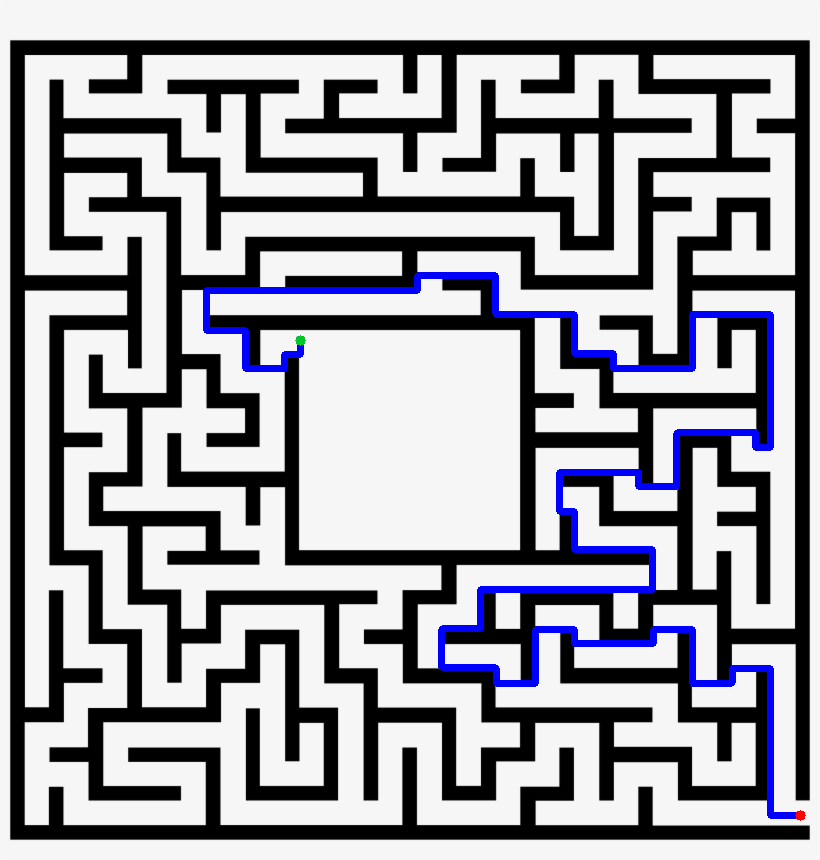

In [98]:
solve = solve_maze_bfs('maze_images/hard_maze.png', 300, 340, 800,815)
solve

In [73]:
solve.show()

### need to fix this bug:

rows 1200
cols 1200
found
drawing path


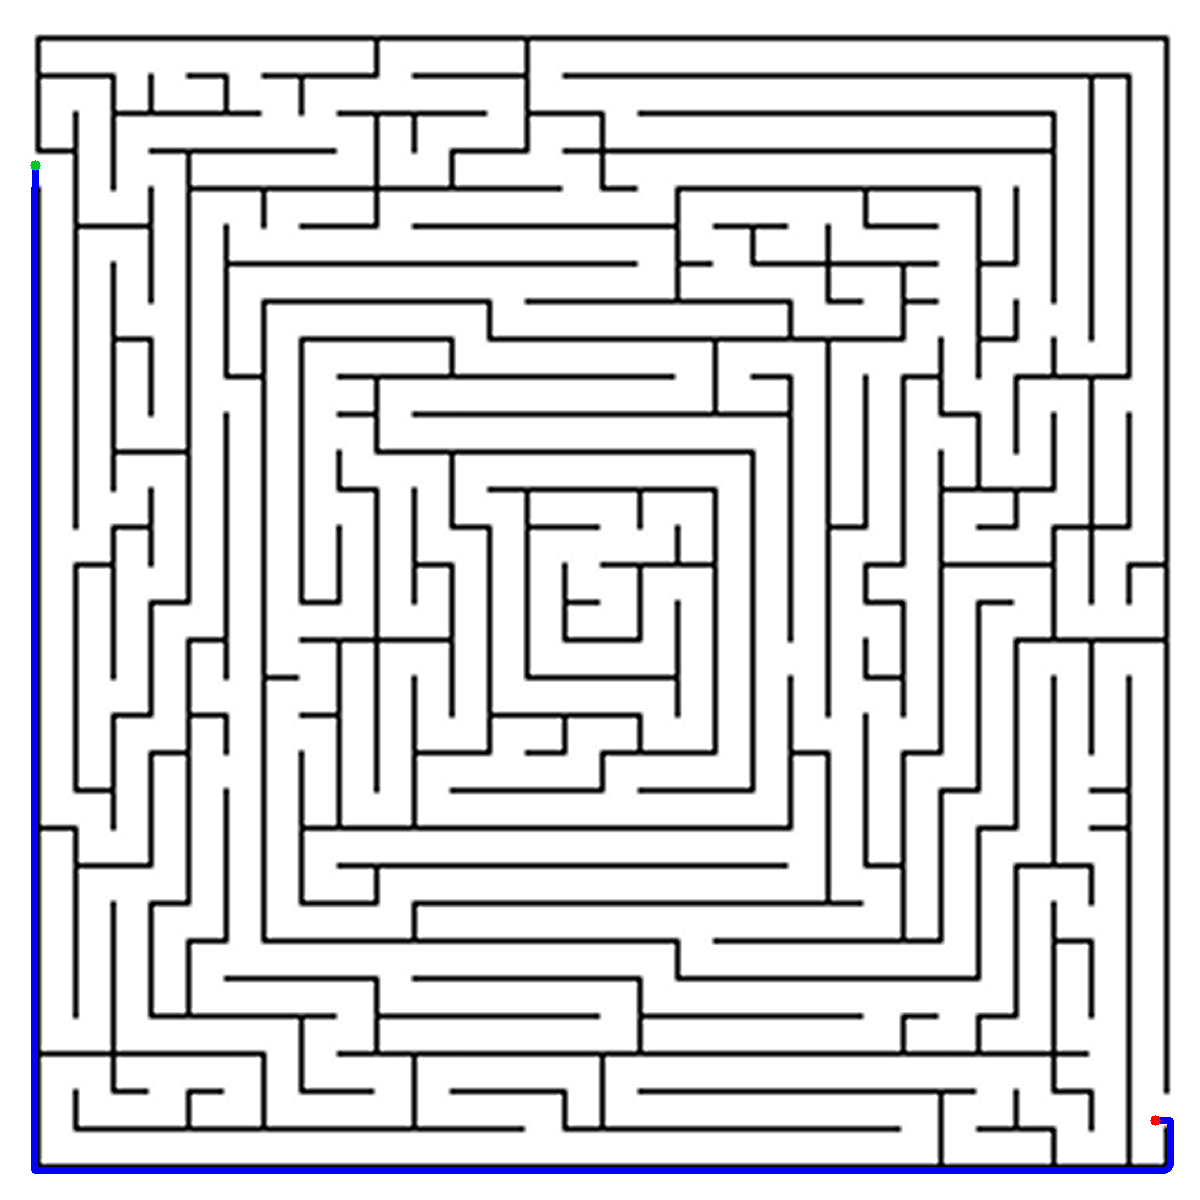

In [103]:
solve2 = solve_maze_bfs('maze_images/hard_maze2.png', 35, 165, 1155, 1120)
solve2

### Easy fix by cropping image

rows 1128
cols 1131
found
drawing path


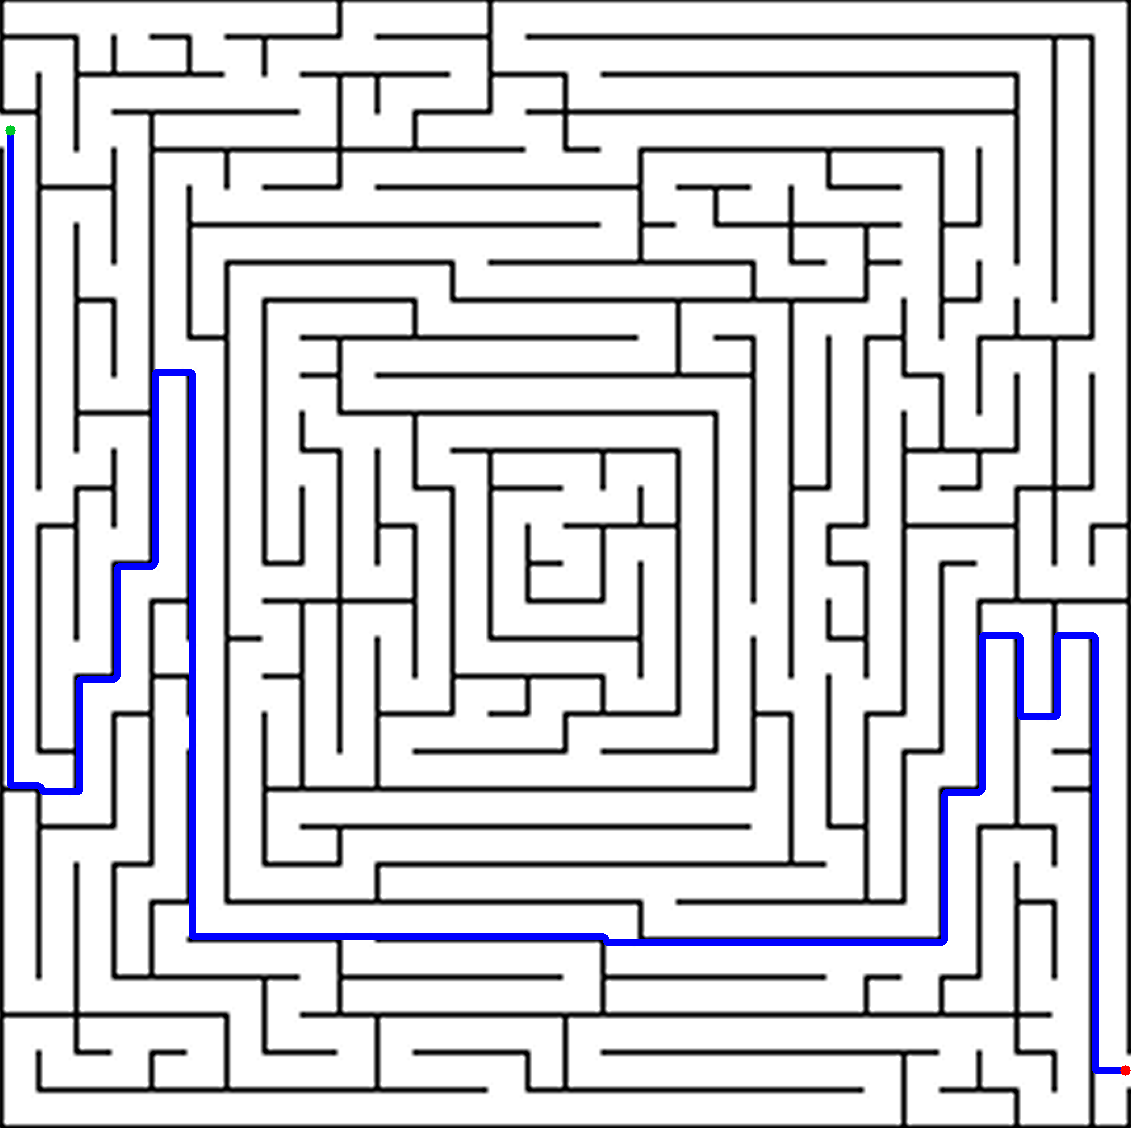

In [99]:
solve3 = solve_maze_bfs('maze_images/hard_maze2_cropped.png', 10, 130, 1125, 1070)
solve3

In [97]:
solve2.show()

rows 178
cols 283
found
drawing path


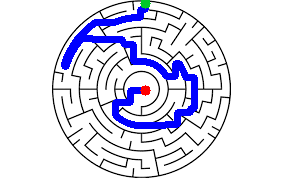

In [104]:
circle = solve_maze_bfs('maze_images/circle_maze.png',145,3,145,90)
circle